<a href="https://colab.research.google.com/github/sjunc/AI-Library/blob/main/class/W02_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 사인함수 예측

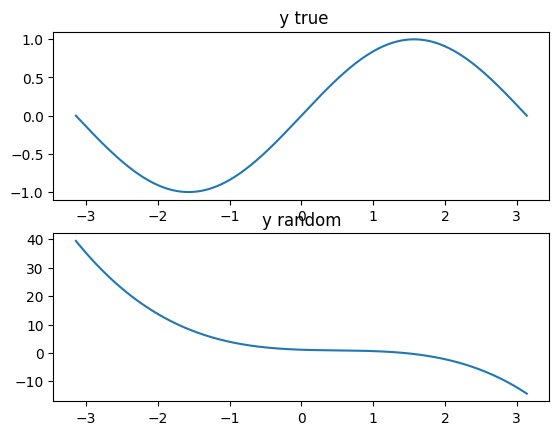

In [ ]:
import math
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)

a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())
y_random = a * x**3 + b * x**2 + c * x + d

plt.subplot(2,1,1)
plt.title(" y true")
plt.plot(x, y)

plt.subplot(2,1,2)
plt.title("y random")
plt.plot(x, y_random)

plt.show()

In [ ]:
learnig_rate = 1e-6

for epoch in range(10000):
    y_pred = a * x**3 + b * x**2 + c * x + d
    # 손실 정의
    loss = (y_pred - y).pow(2).sum().item()
    if epoch % 100 == 0:
      print(f"epoch: {epoch+1} loss: {loss}")

    # 기울기의 미분값
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = (grad_y_pred * x ** 3).sum()
    grad_b = (grad_y_pred * x ** 2).sum()
    grad_c = (grad_y_pred * x).sum()
    grad_d = grad_y_pred.sum()

    #가중치 업데이트
    a -= learnig_rate * grad_a
    b -= learnig_rate * grad_b
    c -= learnig_rate * grad_c
    d -= learnig_rate * grad_d


epoch: 1 loss: 9.07575511932373
epoch: 101 loss: 8.262947082519531
epoch: 201 loss: 7.593160629272461
epoch: 301 loss: 7.041073799133301
epoch: 401 loss: 6.585877418518066
epoch: 501 loss: 6.2104620933532715
epoch: 601 loss: 5.900760173797607
epoch: 701 loss: 5.6451826095581055
epoch: 801 loss: 5.434226036071777
epoch: 901 loss: 5.260048866271973
epoch: 1001 loss: 5.116190433502197
epoch: 1101 loss: 4.997340202331543
epoch: 1201 loss: 4.8991265296936035
epoch: 1301 loss: 4.817934989929199
epoch: 1401 loss: 4.750802040100098
epoch: 1501 loss: 4.695276737213135
epoch: 1601 loss: 4.649338722229004
epoch: 1701 loss: 4.6113200187683105
epoch: 1801 loss: 4.5798444747924805
epoch: 1901 loss: 4.553781986236572
epoch: 2001 loss: 4.532196044921875
epoch: 2101 loss: 4.514309883117676
epoch: 2201 loss: 4.499484539031982
epoch: 2301 loss: 4.487195014953613
epoch: 2401 loss: 4.477004051208496
epoch: 2501 loss: 4.468550682067871
epoch: 2601 loss: 4.461535930633545
epoch: 2701 loss: 4.455715179443359


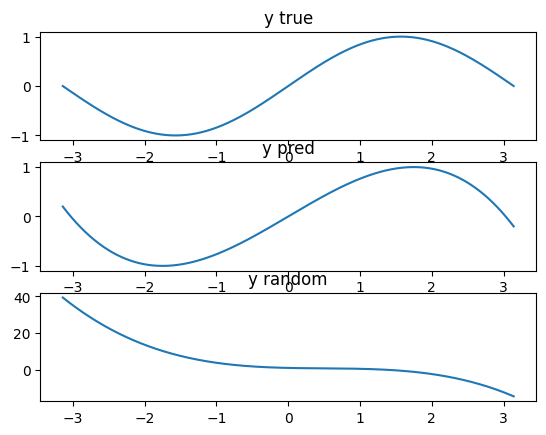

In [ ]:
# 표 작성
plt.subplot(3, 1, 1)
plt.title("y true")
plt.plot(x, y)

plt.subplot(3, 1, 2)
plt.title("y pred")
plt.plot(x, y_pred)

plt.subplot(3, 1, 3)
plt.title("y random")
plt.plot(x, y_random)

plt.show()

## 보스턴 집값 예측하기

In [45]:
!pip install scikit-learn==1.1.2
import pandas as pd

from sklearn.datasets import load_boston

# 보스턴 데이터셋 로드
dataset = load_boston()

# 데이터프레임 생성
df = pd.DataFrame(dataset["data"])
df.columns = dataset["feature_names"]

# 타겟 변수 추가
df["target"] = dataset["target"]

# 데이터 확인
print(df.head())


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 44.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [46]:
import torch
import torch.nn as nn
import math

from torch.optim.adam import Adam # 다양한 최적화 존재 ex)SGD,

#모델 정의
model = nn.Sequential(
    nn.Linear(13, 100),
    nn.ReLU(),
    nn.Linear(100, 1)
)

X = df.iloc[:, : 13].values
Y = df["target"].values

batch_size = 100
learnig_rate = 0.001

optim = Adam(model.parameters(), lr=learnig_rate)

for epoch in range(200):

    for i in range(math.ceil(len(X))):# (len(X)// batch_size):은 길이가 맞아 떨어지지 않으면 학습하지 않는 부분 존재
        start = i * batch_size
        end = start + batch_size

        x = torch.tensor(X[start:end])
        y = torch.tensor(Y[start:end])

        optim.zero_grad()
        preds = model(x)
        loss = nn.MSELoss()(preds, y)
        loss.backward()
        optim.step()

    if epoch % 20 == 0:
      print(f"epoch:{epoch} loss: {loss.item()}")

prediction = model(torch.FloatTensor(X[0, :13]))
real = Y[0]
print(f"predictin: {prediction.item()}real: {real}")

NameError: name 'df' is not defined

In [47]:
# 그래프
import numpy as np
import matplotlib.pyplot as plt

num_samples = 10
predictions = model(torch.FloatTensor(X[:num_samples, :13])).detach().numpy().flatten()
real_values = Y[:num_samples]

x = np.arange(num_samples)

plt.figure(figsize=(10, 5))
plt.bar(x -0.2, real_values, width=0.4, label="Real Values", color = "blue", alpha =0.7)
plt.bar(x +0.2, predictions, width=0.4, label="Predictions", color = "orange", alpha = 0.7)

plt.xticks(x, [f"Sample {i+1}"for i in range(num_samples)])

plt.ylabel("House Price")
plt.title("Real Values vs. Predictions (Bar Chart)")
plt.legend()
plt.show()

NameError: name 'X' is not defined

## 손글씨 분류하기

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.47MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 163kB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.51MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.51MB/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

60000
10000


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

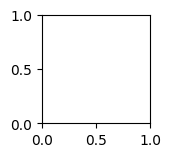

In [48]:
import matplotlib.pyplot as plt

from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

training_data = MNIST(root = "./", train = True, download = True, transform = ToTensor())
test_data = MNIST(root = "./", train = False, download = True, transform = ToTensor())

print(len(training_data))
print(len(test_data))

for i in range(9):
  plt.subplot(3, 3, i +1)
  plt.imshow(training_data[i])
plt.show()


In [49]:
from torch.utils.data.dataloader import DataLoader

train_loader = DataLoader(training_data, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 32, shuffle = False)


In [50]:
import torch
import torch.nn as nn

from torch.optim.adam import Adam

device = "cuda" if torch.cuda.is_available() else "cpu"

model = nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)

In [52]:
lr = 1e-3
optim = Adam(model.parameters(), lr =lr)

for epoch in range(20):
  for data, label in train_loader:
    optim.zero_grad()

    data = torch.reshape(data, (-1, 784)).to(device)
    preds = model(data)

    loss = nn.CrossEntropyLoss()(preds, label.to(device))
    loss.backward()
    optim.step()

  print(f"epoch: {epoch+1} loss: {loss.item()}")

torch.save(model.state_dict(), "MNIST.pth")

epoch: 1 loss: 0.09022597223520279
epoch: 2 loss: 0.061011672019958496
epoch: 3 loss: 0.04587889835238457
epoch: 4 loss: 0.27451059222221375
epoch: 5 loss: 0.02453071065247059
epoch: 6 loss: 0.0317276231944561
epoch: 7 loss: 0.02445162646472454
epoch: 8 loss: 0.0016892533749341965
epoch: 9 loss: 0.004180392250418663
epoch: 10 loss: 0.1250053197145462
epoch: 11 loss: 0.00022827190696261823
epoch: 12 loss: 0.03536668047308922
epoch: 13 loss: 0.0003552100097294897
epoch: 14 loss: 0.017736030742526054
epoch: 15 loss: 0.00906578078866005
epoch: 16 loss: 0.0028779865242540836
epoch: 17 loss: 0.11872896552085876
epoch: 18 loss: 0.003399602370336652
epoch: 19 loss: 0.1135343462228775
epoch: 20 loss: 0.0004965437110513449


In [53]:
model.load_state_dict(torch.load("MNIST.pth", map_location=device))

num_corr = 0

with torch.no_grad():
  for data, label in test_loader:
    data = torch.reshape(data, (-1, 784)).to(device)
    output = model(data.to(device))
    preds = output.data.max(1)[1]

    corr = preds.eq(label.to(device).data).sum().item()
    num_corr += corr

  print(f"accuracy: {num_corr/len(test_loader.dataset)}")


<ipython-input-53-aed0f1a0d14d>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("MNIST.pth", map_location=device))


accuracy: 0.9704
